# 6. Support Vector Machine (SVM) with scikit

Support Vector Machine (SVM) is a supervised machine learning algorithm capable of performing classification and regression. We study the formulation of SVM in the main course (see Kernel machines). This quick and simple tutorial shows a SVM in action on a toy problem using a popular pattern recognition toolbox (scikit). This tutorial is inspired by this [one](https://towardsdatascience.com/support-vector-machine-python-example-d67d9b63f1c8), which we highly recommend to better understand how the classifier works internally. We also recommend checking out [scikit documentation](https://scikit-learn.org/stable/modules/svm.html)!

## 6.1 Linear SVM example

We start importing the needed python libraries...

In [96]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

We generate our training and test data sampling from two 2D normal distributions (2-class). You can try using any other kind of data!

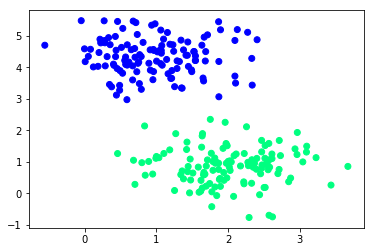

In [97]:
X, y = make_blobs(n_samples=250, centers=2,
                  random_state=0, cluster_std=0.60)
y[y == 0] = -1 # labels as -1 or +1
tmp = np.ones(len(X))
y = tmp * y

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

We create and train our classifier

In [98]:
our_svm = LinearSVC()
our_svm.fit(X_train, y_train) # training function

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

After training the model, we can plot the decision boundary and support vectors


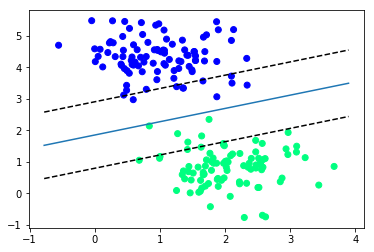

In [99]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter');
ax = plt.gca()
xlim = ax.get_xlim()
w = our_svm.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])

yy = a * xx - our_svm.intercept_[0] / w[1]
plt.plot(xx, yy)

yy = a * xx - (our_svm.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')

yy = a * xx - (our_svm.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')

We predict which sample belongs to what class based off which side of the line they fall.

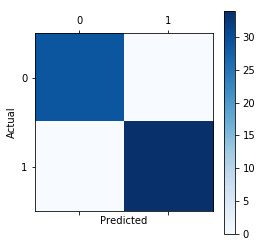

In [100]:
y_pred = our_svm.predict(X_test)
cm=confusion_matrix(y_test, y_pred)

plt.matshow(cm, cmap = 'Blues')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## 6.2 Non-Linear SVM

In the previous example we used a linear SVM which worked fine in our problem given that both classes are linearly separable. Now let's see an example of using a non-linear SVM with a RBF kernel!

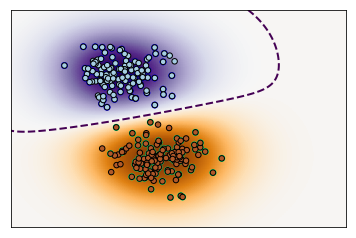

In [101]:
from sklearn.svm import NuSVC

xx, yy = np.meshgrid(np.linspace(-2, 7, 500),
                     np.linspace(-2, 7, 500))

svm_non_linear = NuSVC(gamma='auto')
svm_non_linear.fit(X, y)

Z = svm_non_linear.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter');


plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linestyles='dashed')
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.show()

What if the classes are not linearly separable? Let's create a new dataset based on a XOR of the inputs and use a non linear SVM:

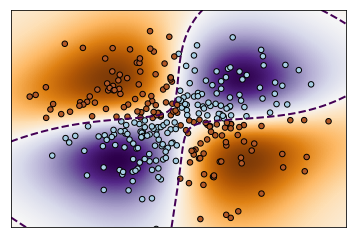

In [102]:
 # creating data
    
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model 

svm_non_linear.fit(X, y)

Z = svm_non_linear.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linestyles='dashed')
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()


## What now?

Well done, you made it to the end of the tutorial! What now? Play with different parameters such as C or kernel type! Think about how you can use the functions that we learnt to deal with a multiclass problem (i.e. more than 2 classes!) and try with a more realistic dataset!

Checkout the excellent [scikit documentation](https://scikit-learn.org/stable/modules/svm.html) for more examples, information on parameters and tips!